<center><font size="10">🚢🏊🏻‍♀️Titanic Start Here: A GENTLE Introduction</font></center>
<br>
<center><font size="3">Introdution</font></center>
> In this Kernel we will see 3 approaches to the classification task in detail.
> 1. [Import Data & Python Packages](#1-bullet) <br>
> 2. [Missing Value Handling](#2-bullet)<br>
>     * [2.1 Age - Missing Values](#2.1-bullet) <br>
>     * [2.2 Embarked - Missing Values](#2.2-bullet) <br>
>     * [2.3 Final Adjustments to Data](#2.3-bullet) <br>
>     * [2.4 Additional Variables](#2.4-bullet) <br> 
> 3. [Exploratory Data Analysis](#3-bullet) <br>
> 4. [Alternate Approach 1 :Logistic Regression](#4-bullet) <br>
> 5. [Alternate Approach 2 : Random Forest Estimation](#5-bullet) <br>
> 6. [Alternate Approach 3: Decision Tree](#6-bullet) <br>
> 7. [Ensemble](#7-bullet)
> 8. [TOP 1% Solution GA](#8-bullet)

## 1. Import Data & Python Packages <a class="anchor" id="1-bullet"></a>

In [1]:
import numpy as np 
import pandas as pd 
import sys

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="dark") #white background style for seaborn plots
sns.set(style="darkgrid", color_codes=True)
RED   = "\033[1;31m"  
BLUE  = "\033[1;34m"
CYAN  = "\033[1;36m"
GREEN = "\033[0;32m"
#sklearn imports source: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [2]:
# get titanic & test csv files as a DataFrame

#developmental data (train)
titanic_df = pd.read_csv('D:\\python\\PyProjects\\Kaggle\\train.csv')

#cross validation data (hold-out testing)
test_df    = pd.read_csv('D:\\python\\PyProjects\\Kaggle\\test.csv')

# preview developmental data
titanic_df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 2. Data Quality & Missing Value Assessment <a class="anchor" id="2-bullet"></a>

### 2.1    Age - Missing Values <a class="anchor" id="2.1-bullet"></a>

Count of missing Values : 177 , The Proportion of this values with dataset is 19.869999999999997

visualization AGE


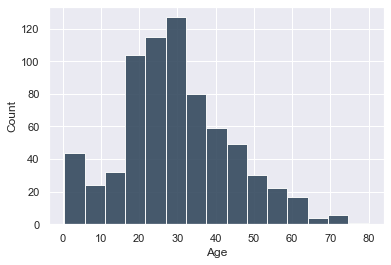

In [4]:
a=sum(pd.isnull(titanic_df['Age'])) # COUNT Missing Values in age
b=round(a/(len(titanic_df["PassengerId"])),4) # proportion of "Age" missing in percent
sys.stdout.write(GREEN)
print("Count of missing Values : {} , The Proportion of this values with dataset is {}\n".format(a,b*100))
sys.stdout.write(CYAN)
print("visualization AGE")
ax = titanic_df["Age"].hist(bins=15, color='#34495e', alpha=0.9)
ax.set(xlabel='Age', ylabel='Count')
plt.show()

> Since "Age" is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired.  To deal with this, we'll use the median to impute the missing values. 

In [5]:
m1=titanic_df["Age"].median(skipna=True)
m2=titanic_df["Age"].mean(skipna=True)
sys.stdout.write(CYAN)
print("Median: {} and Mean: {} | Median age is 28 as compared to mean which is ~30".format(m1,m2))

Median: 28.0 and Mean: 29.69911764705882 | Median age is 28 as compared to mean which is ~30


### 2.2 Embarked - Missing Values <a class="anchor" id="2.2-bullet"></a>

In [6]:
# proportion of "Embarked" missing
a=round(2/len(titanic_df["PassengerId"]),4)
sys.stdout.write(CYAN)
print('proportion of "Embarked" missing is {}'.format(a*100))

proportion of "Embarked" missing is 0.22


visualization Embarked


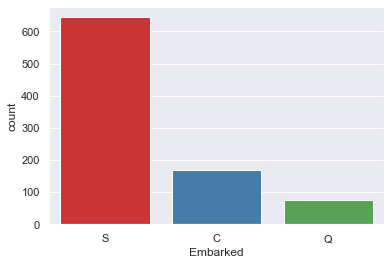

In [7]:
sys.stdout.write(CYAN)
print('visualization Embarked')
sns.countplot(x='Embarked',data=titanic_df,palette='Set1')
plt.show()

### 2.3 Final Adjustments to Data (Train & Test) <a class="anchor" id="2.3-bullet"></a>

> Based on my assessment of the missing values in the dataset, I'll make the following changes to the data:
> * If "Age" is missing for a given row, I'll impute with 28 (median age).
> * If "Embark" is missing for a riven row, I'll impute with "S" (the most common boarding port).
> * I'll ignore "Cabin" as a variable.  There are too many missing values for imputation.  Based on the information available, it appears that this value is associated with the passenger's class and fare paid.

In [8]:
train_data = titanic_df
train_data["Age"].fillna(28, inplace=True)
train_data["Embarked"].fillna("S", inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

### 2.4 Additional Variables <a class="anchor" id="2.4-bullet"></a>

> According to the Kaggle data dictionary, both SibSp and Parch relate to traveling with family.  For simplicity's sake (and to account for possible multicollinearity), we will combine the effect of these variables into one categorical predictor: whether or not that individual was traveling alone.

In [9]:
## Create categorical variable for traveling alone
train_data['TravelBuds']=train_data["SibSp"]+train_data["Parch"]
train_data['TravelAlone']=np.where(train_data['TravelBuds']>0, 0, 1)

train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)
train_data.drop('TravelBuds', axis=1, inplace=True)

#create categorical variable for Pclass || ONE HOT ENCODING
train2 = pd.get_dummies(train_data, columns=["Pclass"])

train3 = pd.get_dummies(train2, columns=["Embarked"])

train4=pd.get_dummies(train3, columns=["Sex"])
train4.drop('Sex_female', axis=1, inplace=True)

#Drop Unwanted
train4.drop('PassengerId', axis=1, inplace=True)
train4.drop('Name', axis=1, inplace=True)
train4.drop('Ticket', axis=1, inplace=True)
train4.head(5)
df_final = train4

In [10]:
df_final.head(10)

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1
5,0,28.0,8.4583,1,0,0,1,0,1,0,1
6,0,54.0,51.8625,1,1,0,0,0,0,1,1
7,0,2.0,21.0750,0,0,0,1,0,0,1,1
8,1,27.0,11.1333,0,0,0,1,0,0,1,0
9,1,14.0,30.0708,0,0,1,0,1,0,0,0


### Apply the same changes to the test data. <br>


In [11]:
test_df["Age"].fillna(28, inplace=True)
test_df["Fare"].fillna(14.45, inplace=True)
#test_df.drop('Cabin', axis=1, inplace=True)

In [12]:
test_df.drop('Cabin', axis=1, inplace=True)

In [13]:
test_df['TravelBuds']=test_df["SibSp"]+test_df["Parch"]
test_df['TravelAlone']=np.where(test_df['TravelBuds']>0, 0, 1)

test_df.drop('SibSp', axis=1, inplace=True)
test_df.drop('Parch', axis=1, inplace=True)
test_df.drop('TravelBuds', axis=1, inplace=True)

test2 = pd.get_dummies(test_df, columns=["Pclass"])
test3 = pd.get_dummies(test2, columns=["Embarked"])

test4=pd.get_dummies(test3, columns=["Sex"])
test4.drop('Sex_female', axis=1, inplace=True)

test4.drop('PassengerId', axis=1, inplace=True)
test4.drop('Name', axis=1, inplace=True)
test4.drop('Ticket', axis=1, inplace=True)
final_test = test4

In [14]:
final_test.head(5)

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


## 3. Exploratory Data Analysis <a class="anchor" id="3-bullet"></a>

## 3.1 Exploration of Age <a class="anchor" id="3.1-bullet"></a>

Density Plot of Age for Surviving Population and Deceased Population


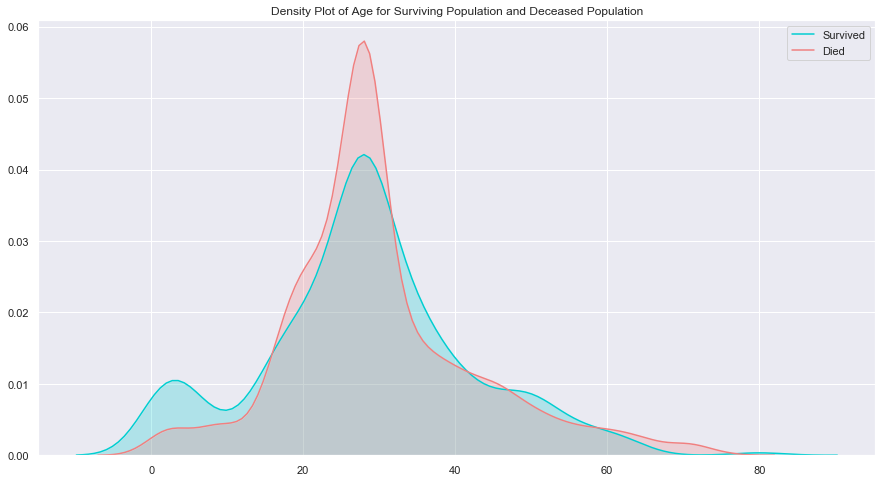

In [15]:
sys.stdout.write(GREEN)
print("Density Plot of Age for Surviving Population and Deceased Population")
plt.figure(figsize=(15,8))
sns.kdeplot(titanic_df["Age"][df_final.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(titanic_df["Age"][df_final.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
plt.show()


> The age distribution for survivors and deceased is actually very similar.  One notable difference is that, of the survivors, a larger proportion were children.  The passengers evidently made an attempt to save children by giving them a place on the life rafts. 

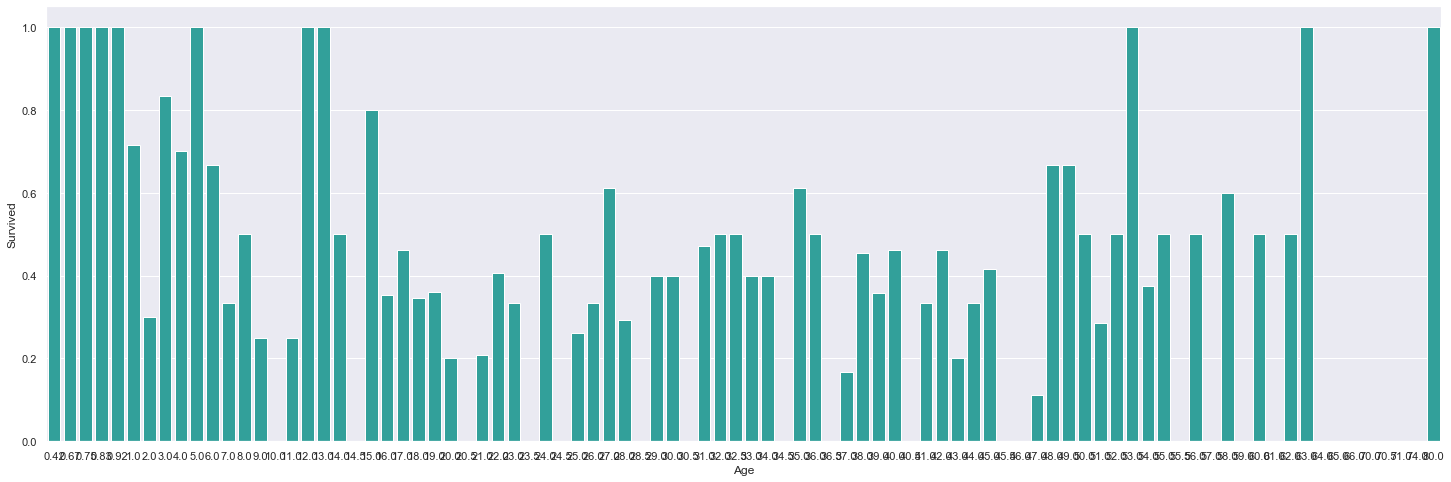

In [16]:
plt.figure(figsize=(25,8))
avg_survival_byage = df_final[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")


> Considering the survival rate of passengers under 16, I'll also include another categorical variable in my dataset: "Minor"

In [17]:
df_final['IsMinor']=np.where(train_data['Age']<=16, 1, 0)

In [18]:
final_test['IsMinor']=np.where(final_test['Age']<=16, 1, 0)

In [19]:
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,34.5,7.8292,1,0,0,1,0,1,0,1,0
1,47.0,7.0000,0,0,0,1,0,0,1,0,0
2,62.0,9.6875,1,0,1,0,0,1,0,1,0
3,27.0,8.6625,1,0,0,1,0,0,1,1,0
4,22.0,12.2875,0,0,0,1,0,0,1,0,0


## 3.2 Exploration of Fare <a class="anchor" id="3.2-bullet"></a>

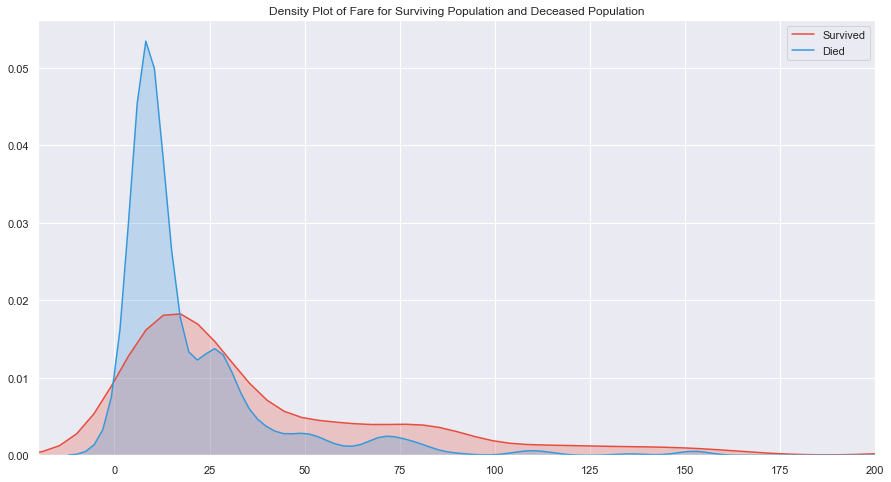

In [20]:
plt.figure(figsize=(15,8))
sns.kdeplot(df_final["Fare"][titanic_df.Survived == 1], color="#e74c3c", shade=True)
sns.kdeplot(df_final["Fare"][titanic_df.Survived == 0], color="#3498db", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
# limit x axis to zoom on most information. there are a few outliers in fare. 
plt.xlim(-20,200)
plt.show()

## 3.3 Exploration of Passenger Class <a class="anchor" id="3.3-bullet"></a>

In [21]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


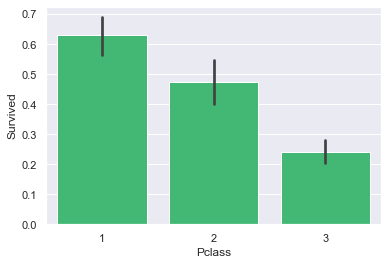

In [22]:
sns.barplot('Pclass', 'Survived', data=titanic_df, color="#2ecc71")
plt.show()

> Unsurprisingly, being a first class passenger was safest.

## 3.4 Exploration of Embarked Port <a class="anchor" id="3.4-bullet"></a>

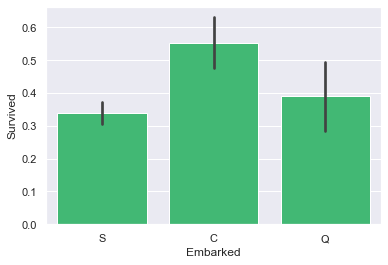

In [23]:
sns.barplot('Embarked', 'Survived', data=titanic_df, color="#2ecc71")
plt.show()

## 3.5 Exploration of Traveling Alone vs. With Family <a class="anchor" id="3.5-bullet"></a>

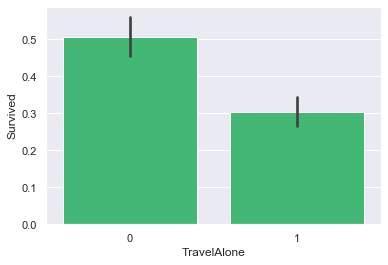

In [24]:
sns.barplot('TravelAlone', 'Survived', data=df_final, color="#2ecc71")
plt.show()

> Individuals traveling without family were more likely to die in the disaster than those with family aboard.  Given the era, it's likely that individuals traveling alone were likely male.

## 4. Logistic Regression <a class="anchor" id="4-bullet"></a>

In [25]:
df_final.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,0,22.0,7.2500,0,0,0,1,0,0,1,1,0
1,1,38.0,71.2833,0,1,0,0,1,0,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1,0


In [26]:
cols=["Age", "Fare", "TravelAlone", "Pclass_1", "Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X=df_final[cols]
Y=df_final['Survived']

In [27]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
sys.stdout.write(GREEN)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.450348
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Mon, 15 Jun 2020   Pseudo R-squ.:                  0.3237
Time:                        17:51:31   Log-Likelihood:                -401.26
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.627e-78
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Age            -0.0096      0.007     -1.372      0.170      -0.023       0.004
Fare            0.0018    

> Nearly all variables are significant at the 0.05 alpha level, but we'll run the model again without Fare and TravelAlone (removed one at a time, results didn't change much.  In the end removed both).  I also removed "IsMinor" from this regression, as the information provided is redundant to the Age variable.

In [28]:
cols2=["Age", "Pclass_1", "Pclass_2","Embarked_C","Embarked_S","Sex_male"]  
X2=df_final[cols2]
Y=df_final['Survived']

logit_model=sm.Logit(Y,X2)
result=logit_model.fit()
sys.stdout.write(GREEN)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.458585
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Mon, 15 Jun 2020   Pseudo R-squ.:                  0.3113
Time:                        17:51:31   Log-Likelihood:                -408.60
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.131e-77
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0158      0.006     -2.602      0.009      -0.028      -0.004
Pclass_1       2.0449      0.

In [29]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X2, Y)

print("Model Accuracy : {:.2f}%".format(logreg.score(X2, Y)*100))

Model Accuracy : 79.12%


In [30]:
logreg.fit(X, Y)

print("Model Accuracy : {:.2f}%".format(logreg.score(X, Y)*100))

Model Accuracy : 79.91%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 4.3 Using 75-25 Split for Cross Validation <a class="anchor" id="4.3-bullet"></a>

In [31]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_final, test_size=0.25)

In [32]:
#re-fit logistic regression on new train sample

cols2=["Age", "Pclass_1", "Pclass_2","Embarked_C","Embarked_S","Sex_male"] 
X3=train[cols2]
Y3=train['Survived']
logit_model3=sm.Logit(Y3,X3)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X3, Y3)
sys.stdout.write(GREEN)
print("Model Accuracy : {:.2f}%".format(logreg.score(X3, Y3)*100))

Model Accuracy : 80.69%


> The score for the new training sample (75% of original) is very close to the original performance, which is good!<br>
> Let's assess how well it scores on the 25% hold-out sample.

In [34]:
from sklearn import metrics
logreg.fit(X3, Y3)

X3_test = test[cols2]
Y3_test = test['Survived']

Y3test_pred = logreg.predict(X3_test)
sys.stdout.write(GREEN)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X3_test, Y3_test)*100))

Accuracy of logistic regression classifier on test set: 74.44


# 4.4 Out-of-sample Assessment <br> <a class="anchor" id="4.4-bullet"></a>

### Assessing the model's performance based on Cross Validation ROC/AUC 

In [35]:
# Model's in sample AUC

from sklearn.metrics import roc_auc_score
logreg.fit(X3, Y3)
Y3_pred = logreg.predict(X3)

y_true = Y3
y_scores = Y3_pred
sys.stdout.write(GREEN)
print("Model ROC_AUC : {:.2f}%".format(roc_auc_score(y_true, y_scores)))

Model ROC_AUC : 0.79%


ROC AUC: 0.815


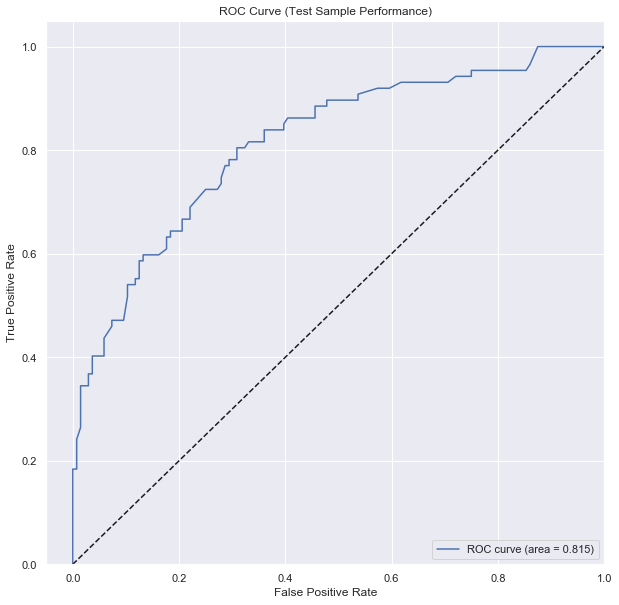

In [36]:
#Visualizing the model's ROC curve (**source for graph code given below the plot)
from sklearn.metrics import roc_curve, auc
logreg.fit(X3, Y3)

y_test = Y3_test
X_test = X3_test
 
# Determine the false positive and true positive rates
FPR, TPR, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
 
# Calculate the AUC
sys.stdout.write(GREEN)
roc_auc = auc(FPR, TPR)
print ('ROC AUC: %0.3f' % roc_auc )
 
# Plot of a ROC curve
plt.figure(figsize=(10,10))
plt.plot(FPR, TPR, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Sample Performance)')
plt.legend(loc="lower right")
plt.show()

> An AUC score of 0.5 is effectively as good as the flip of a coin, and means that the model really has no classification power at all between the positive and negative occurences. The AUC for both the test and train samples when run on my logistic regression demonstrates relatively strong power of separation between positive and negative occurences (survived - 1, died - 0).

# 4.5 Logistic Regression Conclusion<br> <a class="anchor" id="4.5-bullet"></a>
> Based on my analysis, if you were to be aboard the Titanic, your chances of survival were best if you fit the following criteria:<br>
> * Female
> * Young
> * In First Class 
> * Embarked in Cherbourg France


## 5. Random Forest Estimation <a class="anchor" id="5-bullet"></a>

> Our Logistic Regression is effective and easy to interpret, but there are other ML techniques which could provide a more accurate prediction.  Random forests, a tree-based machine learning technique, often provide more accurate results than Logistic Regression classifier models.  With respect to tree growth, performance tends to taper off after a certain number of trees are grown. <br> <br>
> A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

In [44]:
from sklearn.ensemble import RandomForestClassifier

cols=["Age", "Fare", "TravelAlone", "Pclass_1", "Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X=df_final[cols]
Y=df_final['Survived']

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, Y)
sys.stdout.write(GREEN)
print ('ROC AUC: %0.3f' % random_forest.score(X, Y) )

ROC AUC: 0.980


## Final RF Submission

In [45]:
final_test_RF=final_test[cols]
Y_pred_RF = random_forest.predict(final_test_RF)

In [46]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred_RF
    })
submission.to_csv('D:\\python\\PyProjects\\Kaggle\\titanic-02-best-RF.csv', index=False)

## 6. Decision Tree <a class="anchor" id="6-bullet"></a>

> Let's try another method- a decision tree.  There is a tradeoff for the additional complexity of utilizing a decision tree as compared to a logistic regression: growing your number of trees too much can subject your model to overfitting and reduce the predictive power of the model.  I've set parameters within the DecisionTreeClassifier from sklearn to help make sure my model is not overfit (too many branches based on the train data).  Some trial and error went into this to determine the optimal number of branches to "prune" to achieve strong out-of-sample results.<br><br>
> *Note*: Again, I used the same variables for the decision tree as I did in my first logistic regression and in my random forest.

In [48]:
from sklearn import tree

tree1 = tree.DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=3, min_samples_leaf=20)

In [49]:
cols=["Age", "Fare", "TravelAlone", "Pclass_1", "Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X_DT=df_final[cols]
Y_DT=df_final['Survived']

tree1.fit(X_DT, Y_DT)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
import graphviz 
tree1_view = tree.export_graphviz(tree1, out_file=None, feature_names = X_DT.columns.values, rotate=True) 
tree1viz = graphviz.Source(tree1_view)
tree1viz

In [50]:
final_test_DT=final_test[cols]
Y_pred_DT = tree1.predict(final_test_DT)

submission = pd.DataFrame({
       "PassengerId": test_df["PassengerId"],
       "Survived": Y_pred_DT
   })
submission.to_csv('D:\\python\\PyProjects\\Kaggle\\titanic-02-best-DT.csv', index=False)

## 7. Ensemble <a class="anchor" id="7-bullet"></a>

> Ensemble Learning is a process using which multiple machine learning models (such as classifiers) are strategically constructed to solve a particular problem.
> 
> Ensemble methods are meta-algorithms that combine several machine learning techniques into one predictive model in order to decrease variance (bagging), bias (boosting), or improve predictions (stacking).

In [51]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred_RF* 0.8 + Y_pred_DT*0.2 #ensmeble of two models
    })
submission.to_csv('D:\\python\\PyProjects\\Kaggle\\titanic-02-best-Enseble.csv', index=False)

## 8. TOP 1% Solution Genetic Algorithm <a class="anchor" id="8-bullet"></a>

In [ ]:
from sympy import simplify, cos, sin, Symbol, Function, tanh, pprint, init_printing, exp
from sympy.functions import Min,Max

In [ ]:
# the winner variables with former values after the hashtag
A = 0.058823499828577    
B = 0.841127 # 0.885868
C = 0.138462007045746 
D = 0.31830988618379069
E = 2.810815 # 2.675679922103882 
F = 0.63661977236758138
G = 5.428569793701172   
H = 3.1415926535897931
I = 0.592158 #0.623655974864960
J = 4.869778 #  2.770736 # 2.212120056152344
K = 0.063467 # 1.5707963267948966
L = -0.091481 # 0.094339601695538 
M = 0.0821533 
N = 0.720430016517639
O = 0.230145 
P = 9.89287 
Q = 785 
R = 1.07241 
S = 281
T = 734
U = 5.3
V = 67.0
W = 2.484848
X = 8.48635 
Y = 63
Z = 12.6275 
AA = 0.735354 # 0.7
AB = 727
AC = 2.5
AD = 2.6 
AE = 0.3
AF = 3.0
AG = 0.226263 #0.1
AH = 2.0
AI = 12.4148
AJ = 96
AK = 0.130303 # 0.2
AL = 176
AM = 3.2
BIG = [A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM]

In [ ]:
# Now may I present: The winning gen function, Inspired by Akshat's notebook:
# https://www.kaggle.com/akshat113/titanic-dataset-analysis-level-2
def GeneticFunction(data,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM):
    return ((np.minimum( ((((A + data["Sex"]) - np.cos((data["Pclass"] / AH))) * AH)),  ((B))) * AH) +
            np.maximum( ((data["SibSp"] - AC)),  ( -(np.minimum( (data["Sex"]),  (np.sin(data["Parch"]))) * data["Pclass"]))) +
            (AG * ((np.minimum( (data["Sex"]),  (((data["Parch"] / AH) / AH))) * data["Age"]) - data["Cabin"])) +
            np.minimum( ((np.sin((data["Parch"] * ((data["Fare"] - AA) * AH))) * AH)),  ((data["SibSp"] / AH))) +
            np.maximum( (np.minimum( ( -np.cos(data["Embarked"])),  (C))),  (np.sin(((data["Cabin"] - data["Fare"]) * AH)))) +
            -np.minimum( ((((data["Age"] * data["Parch"]) * data["Embarked"]) + data["Parch"])),  (np.sin(data["Pclass"]))) +
            np.minimum( (data["Sex"]),  ((np.sin( -(data["Fare"] * np.cos((data["Fare"] * W)))) / AH))) +
            np.minimum( ((O)),  (np.sin(np.minimum( (((V / AH) * np.sin(data["Fare"]))),  (D))))) +
            np.sin((np.sin(data["Cabin"]) * (np.sin((Z)) * np.maximum( (data["Age"]),  (data["Fare"]))))) +
            np.sin(((np.minimum( (data["Fare"]),  ((data["Cabin"] * data["Embarked"]))) / AH) *  -data["Fare"])) +
            np.minimum( (((AD * data["SibSp"]) * np.sin(((AJ) * np.sin(data["Cabin"]))))),  (data["Parch"])) +
            np.sin(np.sin((np.maximum( (np.minimum( (data["Age"]),  (data["Cabin"]))),  ((data["Fare"] * AK))) * data["Cabin"]))) +
            np.maximum( (np.sin(((AI) * (data["Age"] / AH)))),  (np.sin((-AF * data["Cabin"])))) +
            (np.minimum( (np.sin((((np.sin(((data["Fare"] * AH) * AH)) * AH) * AH) * AH))),  (data["SibSp"])) / AH) +
            ((data["Sex"] - data["SibSp"]) * (np.cos(((data["Embarked"] - AA) + data["Age"])) / AH)) +
            ((np.sin(data["Cabin"]) / AH) - (np.cos(np.minimum( (data["Age"]),  (data["Embarked"]))) * np.sin(data["Embarked"]))) +
            np.minimum( (AE),  ((data["Sex"] * (J * (N - np.sin((data["Age"] * AH))))))) +
            (np.minimum( (np.cos(data["Fare"])),  (np.maximum( (np.sin(data["Age"])),  (data["Parch"])))) * np.cos((data["Fare"] / AH))) +
            np.sin((data["Parch"] * np.minimum( ((data["Age"] - K)),  ((np.cos((data["Pclass"] * AH)) / AH))))) +
            (data["Parch"] * (np.sin(((data["Fare"] * (I * data["Age"])) * AH)) / AH)) +
            (D * np.cos(np.maximum( ((0.5 * data["Fare"])),  ((np.sin(N) * data["Age"]))))) +
            (np.minimum( ((data["SibSp"] / AH)),  (np.sin(((data["Pclass"] - data["Fare"]) * data["SibSp"])))) * data["SibSp"]) +
            np.tanh((data["Sex"] * np.sin((U * np.sin((data["Cabin"] * np.cos(data["Fare"]))))))) +
            (np.minimum( (data["Parch"]),  (data["Sex"])) * np.cos(np.maximum( ((np.cos(data["Parch"]) + data["Age"])),  (AM)))) +
            (np.minimum( (np.tanh(((data["Cabin"] / AH) + data["Parch"]))),  ((data["Sex"] + np.cos(data["Age"])))) / AH) +
            (np.sin((np.sin(data["Sex"]) * (np.sin((data["Age"] * data["Pclass"])) * data["Pclass"]))) / AH) +
            (data["Sex"] * (np.cos(((data["Sex"] + data["Fare"]) * ((X) * (Y)))) / AH)) +
            np.minimum( (data["Sex"]),  ((np.cos((data["Age"] * np.tanh(np.sin(np.cos(data["Fare"]))))) / AH))) +
            (np.tanh(np.tanh( -np.cos((np.maximum( (np.cos(data["Fare"])),  (L)) * data["Age"])))) / AH) +
            (np.tanh(np.cos((np.cos(data["Age"]) + (data["Age"] + np.minimum( (data["Fare"]),  (data["Age"])))))) / AH) +
            (np.tanh(np.cos((data["Age"] * ((-AH + np.sin(data["SibSp"])) + data["Fare"])))) / AH) +
            (np.minimum( (((S) - data["Fare"])),  (np.sin((np.maximum( ((AL)),  (data["Fare"])) * data["SibSp"])))) * AH) +
            np.sin(((np.maximum( (data["Embarked"]),  (data["Age"])) * AH) * (((Q) * H) * data["Age"]))) +
            np.minimum( (data["Sex"]),  (np.sin( -(np.minimum( ((data["Cabin"] / AH)),  (data["SibSp"])) * (data["Fare"] / AH))))) +
            np.sin(np.sin((data["Cabin"] * (data["Embarked"] + (np.tanh( -data["Age"]) + data["Fare"]))))) +
            (np.cos(np.cos(data["Fare"])) * (np.sin((data["Embarked"] - ((T) * data["Fare"]))) / AH)) +
            ((np.minimum( (data["SibSp"]),  (np.cos(data["Fare"]))) * np.cos(data["SibSp"])) * np.sin((data["Age"] / AH))) +
            (np.sin((np.sin((data["SibSp"] * np.cos((data["Fare"] * AH)))) + (data["Cabin"] * AH))) / AH) +
            (((data["Sex"] * data["SibSp"]) * np.sin(np.sin( -(data["Fare"] * data["Cabin"])))) * AH) +
            (np.sin((data["SibSp"] * ((((G + V) * AH) / AH) * data["Age"]))) / AH) +
            (data["Pclass"] * (np.sin(((data["Embarked"] * data["Cabin"]) * (data["Age"] - (R)))) / AH)) +
            (np.cos((((( -data["SibSp"] + data["Age"]) + data["Parch"]) * data["Embarked"]) / AH)) / AH) +
            (D * np.sin(((data["Age"] * ((data["Embarked"] * np.sin(data["Fare"])) * AH)) * AH))) +
            ((np.minimum( ((data["Age"] * A)),  (data["Sex"])) - F) * np.tanh(np.sin(data["Pclass"]))) +
            -np.minimum( ((np.cos(((AB) * ((data["Fare"] + data["Parch"]) * AH))) / AH)),  (data["Fare"])) +
            (np.minimum( (np.cos(data["Fare"])),  (data["SibSp"])) * np.minimum( (np.sin(data["Parch"])),  (np.cos((data["Embarked"] * AH))))) +
            (np.minimum( (((data["Fare"] / AH) - E)),  (C)) * np.sin((K * data["Age"]))) +
            np.minimum( ((M)),  (((np.sin(data["Fare"]) + data["Embarked"]) - np.cos((data["Age"] * (P)))))))

In [ ]:
def CleanData(data):
    # Sex
    data.drop(['Ticket', 'Name'], inplace=True, axis=1)
    data.Sex.fillna('0', inplace=True)
    data.loc[data.Sex != 'male', 'Sex'] = 0
    data.loc[data.Sex == 'male', 'Sex'] = 1
    # Cabin
    data.Cabin.fillna('0', inplace=True)
    data.loc[data.Cabin.str[0] == 'A', 'Cabin'] = 1
    data.loc[data.Cabin.str[0] == 'B', 'Cabin'] = 2
    data.loc[data.Cabin.str[0] == 'C', 'Cabin'] = 3
    data.loc[data.Cabin.str[0] == 'D', 'Cabin'] = 4
    data.loc[data.Cabin.str[0] == 'E', 'Cabin'] = 5
    data.loc[data.Cabin.str[0] == 'F', 'Cabin'] = 6
    data.loc[data.Cabin.str[0] == 'G', 'Cabin'] = 7
    data.loc[data.Cabin.str[0] == 'T', 'Cabin'] = 8
    # Embarked
    data.loc[data.Embarked == 'C', 'Embarked'] = 1
    data.loc[data.Embarked == 'Q', 'Embarked'] = 2
    data.loc[data.Embarked == 'S', 'Embarked'] = 3
    data.Embarked.fillna(0, inplace=True)
    data.fillna(-1, inplace=True)
    return data.astype(float)

# This function rounds values to either 1 or 0, because the GeneticFunction below returns floats and no
# definite values
def Outputs(data):
    return np.round(1.-(1./(1.+np.exp(-data))))

In [ ]:
raw_train = pd.read_csv('../input/titanic/train.csv')
raw_test = pd.read_csv('../input/titanic/test.csv')

cleanedTrain = CleanData(raw_train)
cleanedTest = CleanData(raw_test)
# run a check on the Training dataset. See section "Programm your own gen. algorithm" below on how to 
# construct your own genetic algorithm
thisArray = BIG.copy()
testPredictions = Outputs(GeneticFunction(cleanedTrain,thisArray[0],thisArray[1],thisArray[2],thisArray[3],thisArray[4],thisArray[5],thisArray[6],thisArray[7],thisArray[8],thisArray[9],thisArray[10],thisArray[11],thisArray[12],thisArray[13],thisArray[14],thisArray[15],thisArray[16],thisArray[17],thisArray[18],thisArray[19],thisArray[20],thisArray[21],thisArray[22],thisArray[23],thisArray[24],thisArray[25],thisArray[26],thisArray[27],thisArray[28],thisArray[29],thisArray[30],thisArray[31],thisArray[32],thisArray[33],thisArray[34],thisArray[35],thisArray[36],thisArray[37],thisArray[38]))
pdcheck = pd.DataFrame({'Survived': testPredictions.astype(int)})
ret = pdcheck.Survived.where(pdcheck["Survived"].values==cleanedTrain["Survived"].values).notna()
t,f = ret.value_counts()
score = 100/(t+f)*t
print("Training set score: ",score)

In [ ]:
testPredictions = Outputs(GeneticFunction(cleanedTest,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM))
pdtest = pd.DataFrame({'PassengerId': cleanedTest.PassengerId.astype(int),
                        'Survived': testPredictions.astype(int)})
pdtest.to_csv('submission_GA.csv', index=False)
pdtest.head()